# Eurovision Song Contest
https://eurovision.tv/

### Background
Inspired by Italy's famous <b>Sanremo Music Festival</b>, a song competition was organised by the European Broadcasting Company to replicate its popularity through many countries competing against each other. Running annually nonstop since 1956 (save 2020 during COVID), the competition has seen the inclusion of nations far from European shores such as Israel and Australia.

The competition, despite it popularity, has endured criticism of its format and content. Besides current rules favouring bigger countries, its ranking system has seen certain countries forming voting blocks with each other. The music has also been criticised as run-of-the-mill pop songs where choreography is more important than musical talent as well.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = [file for file in os.listdir("./eurovision_data")]

eurovision_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./eurovision_data/"+file)
    eurovision_data = pd.concat([eurovision_data, df])
    
eurovision_data.to_csv("eurovision_data.csv", index=False)

### Important references
https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

This will allow us to read all files in the directory.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

This will allow us to join the datasheets that we have just read.

In [3]:
eurovisiondata = pd.read_csv("eurovision_data.csv")
eurovisiondata

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
0,1957,f,1957f,J,Belgium,Belgium,0,x
1,1957,f,1957f,J,Belgium,Luxembourg,0,NaN
2,1957,f,1957f,J,Belgium,United Kingdom,1,NaN
3,1957,f,1957f,J,Belgium,Italy,1,NaN
4,1957,f,1957f,J,Belgium,Austria,0,NaN
...,...,...,...,...,...,...,...,...
54193,2019,f,2019f,J,Belarus,Greece,0,NaN
54194,2019,f,2019f,J,Belarus,Germany,8,NaN
54195,2019,f,2019f,J,Belarus,Belarus,0,x
54196,2019,f,2019f,J,Belarus,The Netherlands,0,NaN


We need to add more columns to the dataframe before we answer questions, so what columns do we already have?

In [4]:
eurovisiondata.columns

Index(['Year', '(semi-) final', 'Edition', 'Jury or Televoting',
       'From country', 'To country', 'Points      ', 'Duplicate'],
      dtype='object')

The <b>Points</b> column name has blank spaces that needs to be removed.

In [5]:
eurovisiondata.columns = eurovisiondata.columns.str.strip()
eurovisiondata.columns

Index(['Year', '(semi-) final', 'Edition', 'Jury or Televoting',
       'From country', 'To country', 'Points', 'Duplicate'],
      dtype='object')

We need to add two more columns: <b>Decade</b> and <b>Century</b>.

In [6]:
eurovisiondata = eurovisiondata.astype(str)

In [7]:
eurovisiondata['Decade'] = eurovisiondata['Year'].str[0:3]+'0'
eurovisiondata

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate,Decade
0,1957,f,1957f,J,Belgium,Belgium,0,x,1950
1,1957,f,1957f,J,Belgium,Luxembourg,0,nan,1950
2,1957,f,1957f,J,Belgium,United Kingdom,1,nan,1950
3,1957,f,1957f,J,Belgium,Italy,1,nan,1950
4,1957,f,1957f,J,Belgium,Austria,0,nan,1950
...,...,...,...,...,...,...,...,...,...
54193,2019,f,2019f,J,Belarus,Greece,0,nan,2010
54194,2019,f,2019f,J,Belarus,Germany,8,nan,2010
54195,2019,f,2019f,J,Belarus,Belarus,0,x,2010
54196,2019,f,2019f,J,Belarus,The Netherlands,0,nan,2010


In [8]:
eurovisiondata['Century'] = eurovisiondata['Year'].str[0:2]+'00'
eurovisiondata

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate,Decade,Century
0,1957,f,1957f,J,Belgium,Belgium,0,x,1950,1900
1,1957,f,1957f,J,Belgium,Luxembourg,0,nan,1950,1900
2,1957,f,1957f,J,Belgium,United Kingdom,1,nan,1950,1900
3,1957,f,1957f,J,Belgium,Italy,1,nan,1950,1900
4,1957,f,1957f,J,Belgium,Austria,0,nan,1950,1900
...,...,...,...,...,...,...,...,...,...,...
54193,2019,f,2019f,J,Belarus,Greece,0,nan,2010,2000
54194,2019,f,2019f,J,Belarus,Germany,8,nan,2010,2000
54195,2019,f,2019f,J,Belarus,Belarus,0,x,2010,2000
54196,2019,f,2019f,J,Belarus,The Netherlands,0,nan,2010,2000


Just in case, are all the country names consistent over time?

In [9]:
eurovisiondata['From country'].unique()

array(['Belgium', 'Luxembourg', 'United Kingdom', 'Italy', 'Austria',
       'Netherlands', 'Germany', 'France', 'Denmark', 'Switzerland',
       'Sweden', 'Monaco', 'Norway', 'Spain', 'Finland', 'Yugoslavia',
       'Portugal', 'Ireland', 'Malta', 'Israel', 'Greece',
       'The Netherlands', 'Turkey', 'Morocco', 'Cyprus', 'Iceland',
       'Bosnia & Herzegovina', 'Croatia', 'Slovenia', 'Estonia',
       'Hungary', 'Lithuania', 'Poland', 'Romania', 'Russia', 'Slovakia',
       'F.Y.R. Macedonia', 'Latvia', 'Ukraine', 'Albania', 'Andorra',
       'Belarus', 'Serbia & Montenegro', 'Bulgaria', 'Moldova', 'Armenia',
       'Czech Republic', 'Georgia', 'Montenegro', 'Serbia', 'Azerbaijan',
       'San Marino', 'Australia', 'Macedonia', 'The Netherands',
       'North Macedonia'], dtype=object)

This shows the dataframe has three entries for <b>Macedonia</b>: <i>F.Y.R. Macedonia</i>, <i>Macedonia</i>, and <i>North Macedonia</i>. We also see a spelling error that gives us <i>The Netherlands</i> and <i>The Netherands</i> that we have to change that as well. Let's see if this is the case for <i>To country</i> as well.

In [10]:
eurovisiondata['To country'].unique()

array(['Belgium', 'Luxembourg', 'United Kingdom', 'Italy', 'Austria',
       'Netherlands', 'Germany', 'France', 'Denmark', 'Switzerland',
       'Sweden', 'Monaco', 'Norway', 'Spain', 'Finland', 'Yugoslavia',
       'Portugal', 'Ireland', 'Malta', 'Israel', 'Greece',
       'The Netherlands', 'Turkey', 'Morocco', 'Cyprus', 'Iceland',
       'Bosnia & Herzegovina', 'Croatia', 'Slovenia', 'Estonia',
       'Hungary', 'Lithuania', 'Poland', 'Romania', 'Russia', 'Slovakia',
       'F.Y.R. Macedonia', 'Latvia', 'Ukraine', 'Albania',
       'Serbia & Montenegro', 'Andorra', 'Belarus', 'Moldova', 'Bulgaria',
       'Armenia', 'Georgia', 'Serbia', 'Czech Republic', 'Montenegro',
       'Azerbaijan', 'San Marino', 'Australia', 'Macedonia',
       'North Macedonia'], dtype=object)

There are also three different entries for <b>Macedonia</b> here just as above.

In [11]:
eurovisiondata['fCountry'] = eurovisiondata['From country']
eurovisiondata['tCountry'] = eurovisiondata['To country']
eurovisiondata

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate,Decade,Century,fCountry,tCountry
0,1957,f,1957f,J,Belgium,Belgium,0,x,1950,1900,Belgium,Belgium
1,1957,f,1957f,J,Belgium,Luxembourg,0,nan,1950,1900,Belgium,Luxembourg
2,1957,f,1957f,J,Belgium,United Kingdom,1,nan,1950,1900,Belgium,United Kingdom
3,1957,f,1957f,J,Belgium,Italy,1,nan,1950,1900,Belgium,Italy
4,1957,f,1957f,J,Belgium,Austria,0,nan,1950,1900,Belgium,Austria
...,...,...,...,...,...,...,...,...,...,...,...,...
54193,2019,f,2019f,J,Belarus,Greece,0,nan,2010,2000,Belarus,Greece
54194,2019,f,2019f,J,Belarus,Germany,8,nan,2010,2000,Belarus,Germany
54195,2019,f,2019f,J,Belarus,Belarus,0,x,2010,2000,Belarus,Belarus
54196,2019,f,2019f,J,Belarus,The Netherlands,0,nan,2010,2000,Belarus,The Netherlands


In [12]:
eurovisiondata.loc[(eurovisiondata['fCountry'] == 'F.Y.R. Macedonia') | (eurovisiondata['fCountry'] == 'Macedonia'),'fCountry'] = 'North Macedonia'
eurovisiondata.loc[(eurovisiondata['fCountry'] == 'The Netherlands') | (eurovisiondata['fCountry'] == 'The Netherands'),'fCountry'] = 'Netherlands'

eurovisiondata.loc[(eurovisiondata['tCountry'] == 'F.Y.R. Macedonia') | (eurovisiondata['tCountry'] == 'Macedonia'),'tCountry'] = 'North Macedonia'
eurovisiondata.loc[eurovisiondata['tCountry'] == 'The Netherlands','tCountry'] = 'Netherlands'

eurovisiondata

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate,Decade,Century,fCountry,tCountry
0,1957,f,1957f,J,Belgium,Belgium,0,x,1950,1900,Belgium,Belgium
1,1957,f,1957f,J,Belgium,Luxembourg,0,nan,1950,1900,Belgium,Luxembourg
2,1957,f,1957f,J,Belgium,United Kingdom,1,nan,1950,1900,Belgium,United Kingdom
3,1957,f,1957f,J,Belgium,Italy,1,nan,1950,1900,Belgium,Italy
4,1957,f,1957f,J,Belgium,Austria,0,nan,1950,1900,Belgium,Austria
...,...,...,...,...,...,...,...,...,...,...,...,...
54193,2019,f,2019f,J,Belarus,Greece,0,nan,2010,2000,Belarus,Greece
54194,2019,f,2019f,J,Belarus,Germany,8,nan,2010,2000,Belarus,Germany
54195,2019,f,2019f,J,Belarus,Belarus,0,x,2010,2000,Belarus,Belarus
54196,2019,f,2019f,J,Belarus,The Netherlands,0,nan,2010,2000,Belarus,Netherlands


Let's see if all the names are consistent now.

In [13]:
print(eurovisiondata['fCountry'].unique())
len(eurovisiondata['fCountry'].unique())

['Belgium' 'Luxembourg' 'United Kingdom' 'Italy' 'Austria' 'Netherlands'
 'Germany' 'France' 'Denmark' 'Switzerland' 'Sweden' 'Monaco' 'Norway'
 'Spain' 'Finland' 'Yugoslavia' 'Portugal' 'Ireland' 'Malta' 'Israel'
 'Greece' 'Turkey' 'Morocco' 'Cyprus' 'Iceland' 'Bosnia & Herzegovina'
 'Croatia' 'Slovenia' 'Estonia' 'Hungary' 'Lithuania' 'Poland' 'Romania'
 'Russia' 'Slovakia' 'North Macedonia' 'Latvia' 'Ukraine' 'Albania'
 'Andorra' 'Belarus' 'Serbia & Montenegro' 'Bulgaria' 'Moldova' 'Armenia'
 'Czech Republic' 'Georgia' 'Montenegro' 'Serbia' 'Azerbaijan'
 'San Marino' 'Australia']


52

In [14]:
print(eurovisiondata['tCountry'].unique())
len(eurovisiondata['tCountry'].unique())

['Belgium' 'Luxembourg' 'United Kingdom' 'Italy' 'Austria' 'Netherlands'
 'Germany' 'France' 'Denmark' 'Switzerland' 'Sweden' 'Monaco' 'Norway'
 'Spain' 'Finland' 'Yugoslavia' 'Portugal' 'Ireland' 'Malta' 'Israel'
 'Greece' 'Turkey' 'Morocco' 'Cyprus' 'Iceland' 'Bosnia & Herzegovina'
 'Croatia' 'Slovenia' 'Estonia' 'Hungary' 'Lithuania' 'Poland' 'Romania'
 'Russia' 'Slovakia' 'North Macedonia' 'Latvia' 'Ukraine' 'Albania'
 'Serbia & Montenegro' 'Andorra' 'Belarus' 'Moldova' 'Bulgaria' 'Armenia'
 'Georgia' 'Serbia' 'Czech Republic' 'Montenegro' 'Azerbaijan'
 'San Marino' 'Australia']


52

They are! The numbers match as well. Now let's start answering some questions!

#### Which countries are the top five countries in points per year? per decade? per century? overall?

Because semi-finals were introduced later, we have to remove them so the dataframe only reflects the points during the final round.

In [15]:
eurovisiondata['Points'] = pd.to_numeric(eurovisiondata['Points'])
eurovisiondata['Points'].sum()

137531

In [16]:
eurovisionfinal = eurovisiondata.loc[(eurovisiondata['(semi-) final'] == 'f')]
eurovisionfinal['Points'].sum()

90401

Now our dataframe only counts the points in the final round.

In [17]:
eurovisionfinal1986 = eurovisionfinal.loc[(eurovisionfinal['Year'] == '1986')]
euro_points_1986 = eurovisionfinal1986.groupby(['Year', 'tCountry']).sum(numeric_only=True)
euro_points_1986.sort_values('Points', ascending=False).head(5)

Points
Year tCountry           
1986 Belgium         176
     Switzerland     140
     Luxembourg      117
     Ireland          96
     Sweden           78

In [18]:
eurovisionfinal1980s = eurovisionfinal.loc[(eurovisionfinal['Decade'] == '1980')]
euro_points_1980s = eurovisionfinal1980s.groupby(['tCountry']).sum(numeric_only=True)
euro_points_1980s.sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Germany,951
United Kingdom,945
Ireland,893
Sweden,828
Switzerland,769


In [19]:
eurovisionfinal1900s = eurovisionfinal.loc[(eurovisionfinal['Century'] == '1900')]
euro_points_1900s = eurovisionfinal1900s.groupby(['tCountry']).sum(numeric_only=True)
euro_points_1900s.sort_values('Points', ascending=False).head(5)

,Points
tCountry,
United Kingdom,3209
Ireland,2841
France,2377
Germany,2081
Sweden,2059


In [20]:
euro_points_overall = eurovisionfinal.groupby(['tCountry']).sum(numeric_only=True)
euro_points_overall.sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,5338
United Kingdom,4079
France,3746
Italy,3705
Germany,3453


Synopsis:<br>
1) Belgium won it in 1986 with the song <i>J'aime la vie</i> and did it by 36 points.<br>
2) Germany tops the United Kingdom in the 1980s but trails Ireland in victories (1:2). <br>
3) The United Kingdom, Ireland, France, and (West-) Germany finished the 20th century separated from each other by roughly 300-400 points.<br>
4) Sweden should be crowned king of Eurovision in the 21st century; they are also tied for 1st with Denmark and Ukraine with two wins each.

#### Which countries are the bottom five countries in points per year? per decade? per century? overall?

In [21]:
euro_points_1986.sort_values('Points', ascending=False).tail(5)

Points
Year tCountry        
1986 Iceland       19
     France        13
     Austria       12
     Israel         7
     Cyprus         4

In [22]:
euro_points_1980s.sort_values('Points', ascending=False).tail(5)

,Points
tCountry,
Portugal,279
Greece,262
Turkey,220
Iceland,67
Morocco,7


In [23]:
euro_points_1900s.sort_values('Points', ascending=False).tail(5)

,Points
tCountry,
Slovakia,42
Romania,20
North Macedonia,16
Lithuania,13
Morocco,7


In [24]:
euro_points_overall.sort_values('Points', ascending=False).tail(5)

,Points
tCountry,
Belarus,375
San Marino,92
Montenegro,81
Slovakia,42
Morocco,7


Synopsis:<br>
1) Morocco only participated in Eurovision once back in 1980 and has not returned since.<br>
2) Slovakia's points are the same now as they were the last century because of a lack of participcation from 1999 to 2008. Since their return in 2009, they have either failed to qualify or withdrawn due to a lack of interest. <br>
3) Montenegro, who became independent from Serbia in 2006, is low on the list due to being a new participant. <br>
4) San Marino's participation is also relatively recent; they started in 2008 and have only been consistent since 2011.

#### How do the countries perform overall?

In [25]:
points_pie = euro_points_overall.sort_values(by=['tCountry'])
countries_pie = np.sort(eurovisionfinal['tCountry'].unique())

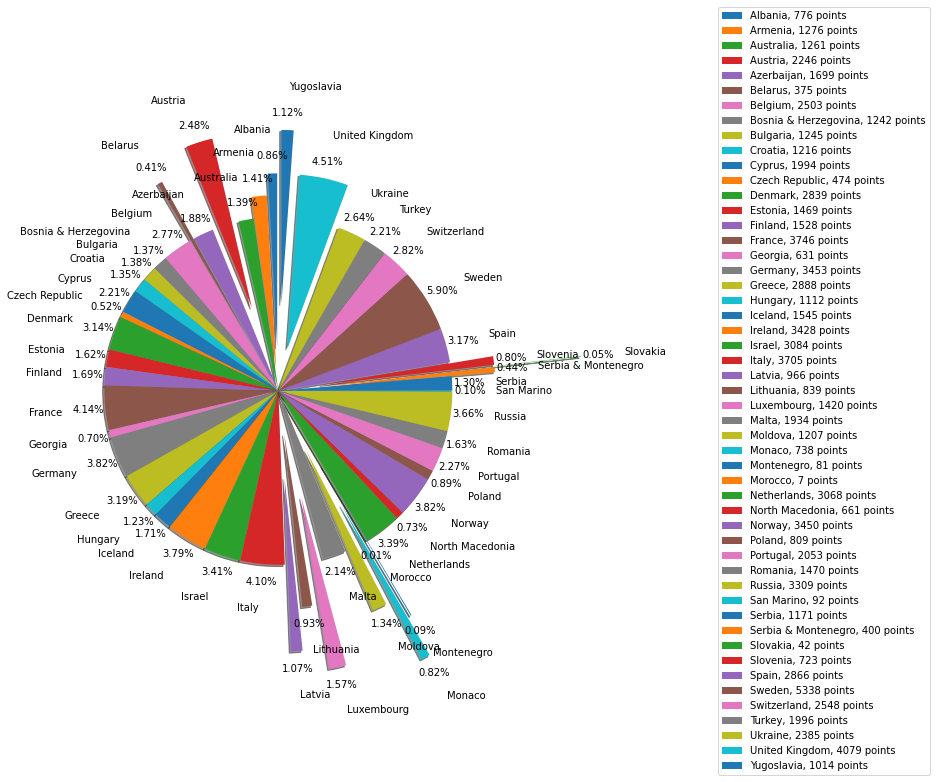

In [26]:
labels = countries_pie
sizes = points_pie.Points
# len(points_pie.Points) = 51
explode = ([0.5, 0.25, 0, 1, 0, 0.75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.5, 1.25, 0, 0.75, 1.5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1.5, 0.5, 0, 0, 0, 0, 0, 0.5, 1])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, radius=2, pctdistance=1.1, labeldistance=1.25)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

With 90.401 points total, Sweden's 5.338 points puts them at nearly 6% of all points distributed. Sweden is then followed by the United Kingdom (4,51%), France (4,14%), Italy (4,10%), Germany (3,82%), Norway (3,82%), and Ireland (3,79%).

#### How do different regions perform overall?

We are going to divide Europe into the regions
- <b>Northern Europe</b>: Estonia, Latvia, Lithuania, Denmark, Finland, Iceland, Norway, and Sweden.
- <b>Southern Europe</b>: Cyprus, Greece, Italy, Malta, Portugal, San Marino, Spain, and Turkey.
- <b>Central and Eastern Europe</b>: Albania, Belarus, Bosnia & Herzegovina, Bulgaria, Armenia, Azerbaijan, Georgia, Croatia, Czechia, Hungary, Moldova, Montenegro, North Macedonia, Poland, Romania, Russia, Serbia, Serbia and Montenegro (Yugoslavia), Slovakia, Slovenia, and Ukraine.
- <b>Western Europe</b>: Austria, Belgium, France, Germany, Ireland, Luxembourg, Monaco, the Netherlands, Switzerland, and the United Kingdom.

and Australia, Israel, and Morocco will fall under <b>Others</b>.

In [27]:
neurope = euro_points_overall.loc[['Estonia', 'Latvia', 'Lithuania', 'Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']].sum()
seurope = euro_points_overall.loc[['Cyprus', 'Greece', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Spain', 'Turkey']].sum()
ceeurope = euro_points_overall.loc[['Albania', 'Belarus', 'Bosnia & Herzegovina', 'Bulgaria', 'Armenia', 'Azerbaijan', 'Georgia', 'Croatia', 'Czech Republic', 'Hungary', 'Moldova', 'Montenegro', 'North Macedonia', 'Poland', 'Romania', 'Russia', 'Serbia', 'Serbia & Montenegro', 'Yugoslavia', 'Slovakia', 'Slovenia', 'Ukraine']].sum()
weurope = euro_points_overall.loc[['Austria', 'Belgium', 'France', 'Germany', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland', 'United Kingdom']].sum()
others = euro_points_overall.loc[['Australia', 'Israel', 'Morocco']].sum()

agg_pts = (neurope[0], seurope[0], ceeurope[0], weurope[0], others[0])
print(agg_pts)

(17974, 17528, 23318, 23801, 4352)


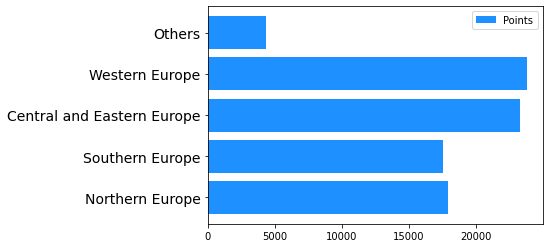

In [28]:
names = ('Northern Europe', 'Southern Europe', 'Central and Eastern Europe', 'Western Europe', 'Others')

plt.barh(np.arange(len(names)), agg_pts, label='Points', color='dodgerblue')
plt.yticks(range(0, len(names)), names, rotation='horizontal', size=14)

plt.legend()

plt.show()

This is most likely due to the sheer amount of countries falling under the <b>Central and Eastern Europe</b> category and Sweden carrying <b>Northern Europe</b>. Let's see if this is true.

#### What are the point averages for each region?

In [29]:
count_neurope = len(euro_points_overall.loc[['Estonia', 'Latvia', 'Lithuania', 'Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']])
count_seurope = len(euro_points_overall.loc[['Cyprus', 'Greece', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Spain', 'Turkey']])
count_ceeurope = len(euro_points_overall.loc[['Albania', 'Belarus', 'Bosnia & Herzegovina', 'Bulgaria', 'Armenia', 'Azerbaijan', 'Georgia', 'Croatia', 'Czech Republic', 'Hungary', 'Moldova', 'Montenegro', 'North Macedonia', 'Poland', 'Romania', 'Russia', 'Serbia', 'Serbia & Montenegro', 'Yugoslavia', 'Slovakia', 'Slovenia', 'Ukraine']])
count_weurope = len(euro_points_overall.loc[['Austria', 'Belgium', 'France', 'Germany', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland', 'United Kingdom']])
count_others = len(euro_points_overall.loc[['Australia', 'Israel', 'Morocco']])

avg_neurope = neurope/count_neurope
avg_seurope = seurope/count_seurope
avg_ceeurope = ceeurope/count_ceeurope
avg_weurope = weurope/count_weurope
avg_others = others/count_others

avg_pts = list(np.around(np.array([avg_neurope[0], avg_seurope[0], avg_ceeurope[0], avg_weurope[0], avg_others[0]]),2))
print(avg_pts)

[2246.75, 2191.0, 1059.91, 2644.56, 1450.67]


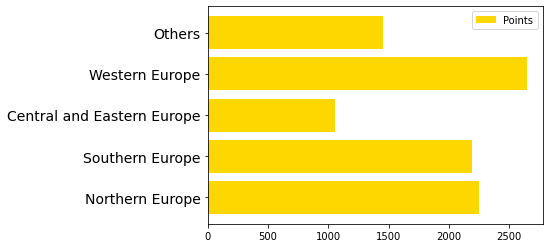

In [30]:
names = ('Northern Europe', 'Southern Europe', 'Central and Eastern Europe', 'Western Europe', 'Others')

plt.barh(np.arange(len(names)), avg_pts, label='Points', color='gold')
plt.yticks(range(0, len(names)), names, rotation='horizontal', size=14)

plt.legend()

plt.show()

It looks like the guess was right! <b>Central and Eastern Europe</b> just had more countries and <b>Northern Europe</b> was carried by Sweden.

#### Are there any regions where a country dominates?

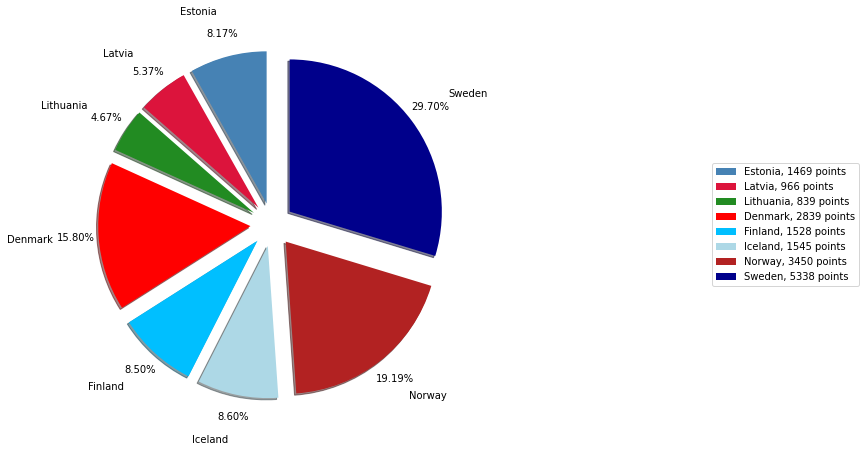

In [31]:
labels = ['Estonia', 'Latvia', 'Lithuania', 'Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']
sizes = [1469, 966, 839, 2839, 1528, 1545, 3450, 5338]
color_set = ['steelblue', 'crimson', 'forestgreen', 'red', 'deepskyblue', 'lightblue', 'firebrick', 'darkblue']

explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Sweden</b> commands northern Europe and has a massive lead over second-place <b>Norway</b>.

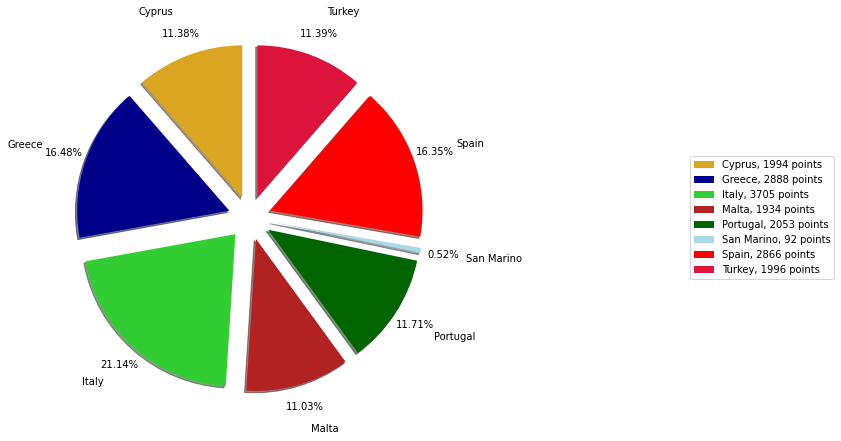

In [32]:
labels = ['Cyprus', 'Greece', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Spain', 'Turkey']
sizes = [1994, 2888, 3705, 1934, 2053, 92, 2866, 1996]
color_set = ['goldenrod', 'darkblue', 'limegreen', 'firebrick', 'darkgreen', 'lightblue', 'red', 'crimson']

explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

No country dominates southern Europe. The only country that jumps out is <b>San Marino</b> for their lack of points.

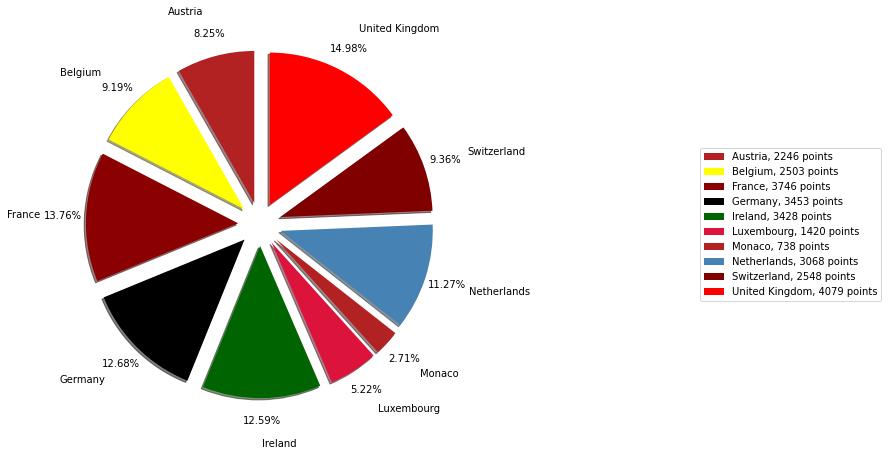

In [33]:
labels = ['Austria', 'Belgium', 'France', 'Germany', 'Ireland', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland', 'United Kingdom']
sizes = [2246, 2503, 3746, 3453, 3428, 1420, 738, 3068, 2548, 4079]
color_set = ['firebrick', 'yellow', 'darkred', 'black', 'darkgreen', 'crimson', 'firebrick', 'steelblue', 'maroon', 'red']

explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

No country also dominates western Europe either. The countries that jump out are <b>Monaco</b> and <b>Luxembourg</b> for their lack of points.

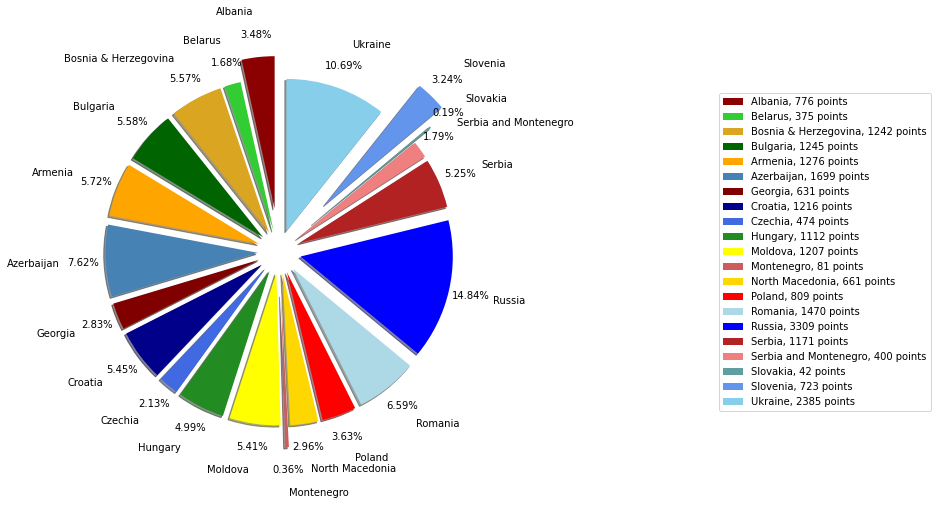

In [34]:
labels = ['Albania', 'Belarus', 'Bosnia & Herzegovina', 'Bulgaria', 'Armenia', 'Azerbaijan', 'Georgia', 'Croatia', 'Czechia', 'Hungary', 'Moldova', 'Montenegro', 'North Macedonia', 'Poland', 'Romania', 'Russia', 'Serbia', 'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Ukraine']
sizes = [776, 375, 1242, 1245, 1276, 1699, 631, 1216, 474, 1112, 1207, 81, 661, 809, 1470, 3309, 1171, 400, 42, 723, 2385]
color_set = ['darkred', 'limegreen', 'goldenrod', 'darkgreen', 'orange', 'steelblue', 'maroon', 'darkblue', 'royalblue', 'forestgreen', 'yellow', 'indianred', 'gold', 'red', 'lightblue', 'blue', 'firebrick', 'lightcoral', 'cadetblue', 'cornflowerblue', 'skyblue']

explode = (0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.75, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Russia</b> and <b>Ukraine</b> lead the way in central and eastern Europe, and most of everyone else except <b>Montenegro</b> and <b>Slovakia</b> are roughly level with each other.

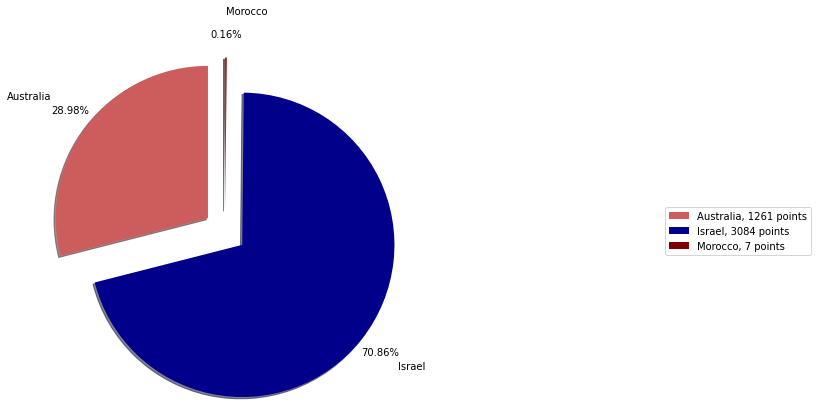

In [35]:
labels = ['Australia', 'Israel', 'Morocco']
sizes = [1261, 3084, 7]
color_set = ['indianred', 'darkblue', 'maroon']

explode = (0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

We finally got something! For all the other non-European participants, <b>Israel</b> is by far the most dominant country in this category.

#### Who are the winners for each year?

Let's build a table that include just years, countries, and points. 

In [36]:
finalpoints = eurovisionfinal.groupby(['Year', 'tCountry']).transform('sum')['Points']

In [37]:
table = eurovisionfinal
table.insert(12, 'Final Points', finalpoints)
table

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate,Decade,Century,fCountry,tCountry,Final Points
0,1957,f,1957f,J,Belgium,Belgium,0,x,1950,1900,Belgium,Belgium,5
1,1957,f,1957f,J,Belgium,Luxembourg,0,nan,1950,1900,Belgium,Luxembourg,8
2,1957,f,1957f,J,Belgium,United Kingdom,1,nan,1950,1900,Belgium,United Kingdom,6
3,1957,f,1957f,J,Belgium,Italy,1,nan,1950,1900,Belgium,Italy,7
4,1957,f,1957f,J,Belgium,Austria,0,nan,1950,1900,Belgium,Austria,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54193,2019,f,2019f,J,Belarus,Greece,0,nan,2010,2000,Belarus,Greece,71
54194,2019,f,2019f,J,Belarus,Germany,8,nan,2010,2000,Belarus,Germany,32
54195,2019,f,2019f,J,Belarus,Belarus,0,x,2010,2000,Belarus,Belarus,38
54196,2019,f,2019f,J,Belarus,The Netherlands,0,nan,2010,2000,Belarus,Netherlands,492


Now deleting the extra columns.

In [38]:
del table['(semi-) final']
del table['Edition']
del table['Jury or Televoting']
del table['From country']
del table['To country']
del table['Points']
del table['Duplicate']
del table['Decade']
del table['Century']
del table['fCountry']
table

,Year,tCountry,Final Points
0,1957,Belgium,5
1,1957,Luxembourg,8
2,1957,United Kingdom,6
3,1957,Italy,7
4,1957,Austria,3
...,...,...,...
54193,2019,Greece,71
54194,2019,Germany,32
54195,2019,Belarus,38
54196,2019,Netherlands,492


Now dropping the duplicates.

In [39]:
table = table.sort_values(['Year', 'Final Points'], ascending=[True, False]).drop_duplicates()
table

,Year,tCountry,Final Points
5,1957,Netherlands,31
7,1957,France,17
8,1957,Denmark,10
1,1957,Luxembourg,8
6,1957,Germany,8
...,...,...,...
51432,2019,Spain,58
51433,2019,Israel,46
51454,2019,Belarus,38
51453,2019,Germany,32


With a cleaner table, we can pluck out the winners of each year by the country with the most amount of points.

In [40]:
Blank = []
Yearly = table['Year'].unique()
Country = []
Points = []

for i in range(len(Yearly)):
    Country.append(table.loc[(table['Year'] == Yearly[i])].head(1)['tCountry'].values)
    Points.append(table.loc[(table['Year'] == Yearly[i])].head(1)['Final Points'].values)
    
Winners = pd.DataFrame(Blank)
Winners.insert(0, 'Year', Yearly)
Winners.insert(1, 'Country', Country)
Winners.insert(2, 'Points', Points)

Winners['Country'] = Winners['Country'].str[0]
Winners['Points'] = Winners['Points'].str[0]

Winners.head(35)

,Year,Country,Points
0,1957,Netherlands,31
1,1958,France,27
2,1959,Netherlands,21
3,1960,France,32
4,1961,Luxembourg,31
5,1962,France,24
6,1963,Denmark,42
7,1964,Italy,49
8,1965,Luxembourg,32
9,1966,Austria,31


We need to make some changes to this table:
- 1956's competition did not publish the points, but the Swiss were the winners.
- Spain was not the only winner in 1969 as it was a four-way tie at the top. France, the Netherlands, and the United Kingdom also shared the title.
- The winner of 1991's competition was actually Sweden, not France.

In [41]:
switzerland = pd.Series(data={'Year': 1956, 'Country': 'Switzerland', 'Points': 0}, name='0')
france = pd.Series(data={'Year': 1969, 'Country': 'France', 'Points': 18}, name='12')
netherlands = pd.Series(data={'Year': 1969, 'Country': 'Netherlands', 'Points': 18}, name='12')
unitedkingdom = pd.Series(data={'Year': 1969, 'Country': 'United Kingdom', 'Points': 18}, name='12')

Winners.loc[-1] = switzerland
Winners.loc[-2] = france
Winners.loc[-3] = netherlands
Winners.loc[-4] = unitedkingdom

Winners.at[34, 'Country'] = 'Sweden'

Winners = Winners.reset_index(drop=True)
Winners.head(35)

,Year,Country,Points
0,1957,Netherlands,31
1,1958,France,27
2,1959,Netherlands,21
3,1960,France,32
4,1961,Luxembourg,31
5,1962,France,24
6,1963,Denmark,42
7,1964,Italy,49
8,1965,Luxembourg,32
9,1966,Austria,31


This gives us a concise table of just years, countries, and points.

#### Who have won the most Eurovisions?

In [42]:
Winners.groupby(['Country']).count().sort_values('Points', ascending=False)

,Year,Points
Country,,
Ireland,7,7
Sweden,6,6
Luxembourg,5,5
Netherlands,5,5
France,5,5
United Kingdom,4,4
Israel,4,4
Denmark,3,3
Spain,3,3


<b>Ireland</b>! The island country has topped the event seven times! They are followed by Sweden who has won it six times. Luxembourg, the Netherlands, and France have each won it five times. The United Kingdom and Israel have each won it four times. Denmark, Norway, and Spain have each won it three times.

<b>Ukraine</b> and four other countries have each won it twice, but given <b>Ukraine</b>'s recent entry, their two titles might make them the most impressive country of all participants.

#### Which years did Ireland win it and how many points did they get?

In [43]:
Winners.loc[(Winners['Country'] == 'Ireland')]

,Year,Country,Points
13,1970,Ireland,32
23,1980,Ireland,143
30,1987,Ireland,172
35,1992,Ireland,155
36,1993,Ireland,187
37,1994,Ireland,226
39,1996,Ireland,162


<b>Ireland</b>'s victories span over three decades, but they have not won it again since 1996.

#### How does Ireland's 1994 victory compare to every other?

In [44]:
Winners.sort_values('Points', ascending=False).head(17)

,Year,Country,Points
60,2017,Portugal,758
59,2016,Ukraine,534
61,2018,Israel,529
62,2019,Netherlands,492
52,2009,Norway,387
55,2012,Sweden,372
58,2015,Sweden,365
49,2006,Finland,292
57,2014,Austria,290
56,2013,Denmark,281


Since the points assigned have increased, their victory in 1994 is only 17th ranked.

#### What was Ireland's winning percentage during each of their victories?

In [45]:
ireland = {'year': [1970, 1980, 1987, 1992, 1993, 1994, 1996], 'pct': list(np.around(np.array([1/15, 2/25, 3/32, 4/37, 5/38, 6/39, 7/41]), 2))}
print(ireland['pct'])

[0.07, 0.08, 0.09, 0.11, 0.13, 0.15, 0.17]


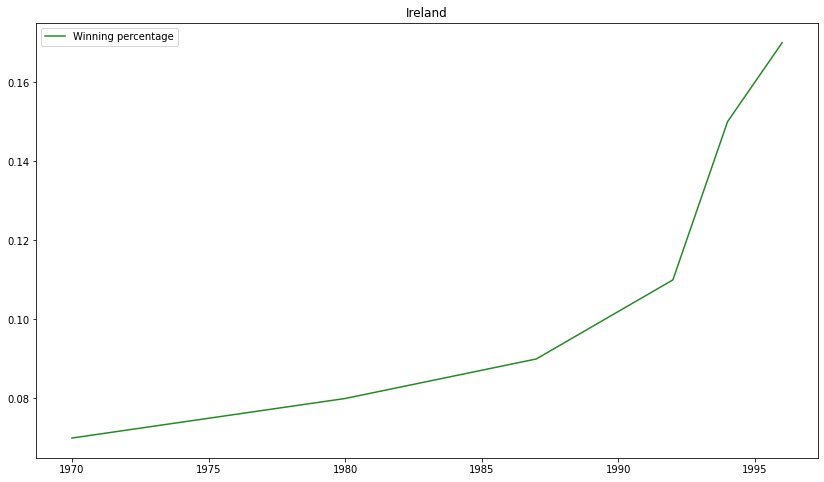

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.title('Ireland')
plt.plot(ireland['year'], ireland['pct'], label='Winning percentage', color='forestgreen')

plt.legend()

plt.show()

Defining <i>winning percentage</i> as the percentage of the total amount of wins in relative to the total amount of competitions, we see <b>Ireland</b>'s percentage jumped after they went back-to-back-to-back during the early 1990s. By their last win in 1996, <b>Ireland</b> accounted for over a sixth of all Eurovision wins.

<b>Ireland</b>'s current <i>winning percentage</i> is only about 10%.

#### Who else have been winning after the Irish?

In [47]:
postireland = Winners.tail(27)[:23]
postireland.groupby(['Country']).count().sort_values('Points', ascending=False)

,Year,Points
Country,,
Sweden,3,3
Denmark,2,2
Ukraine,2,2
Israel,2,2
Austria,1,1
Norway,1,1
Turkey,1,1
Serbia,1,1
Russia,1,1


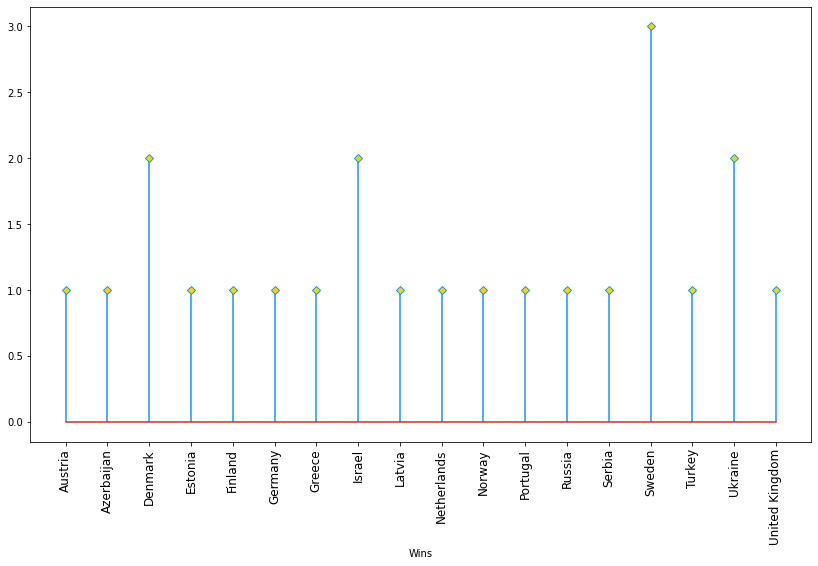

In [48]:
w_countries = [country for country in postireland.Country.unique()]
wins = [win for win in postireland.groupby(['Country']).count()['Points']]

plt.figure(figsize=(14,8))

markerline, stemlines, baseline=plt.stem(sorted(w_countries), wins, linefmt='dodgerblue', markerfmt='D')
markerline.set_markerfacecolor('gold')
plt.xticks(rotation='vertical', size=12)
plt.xlabel('Wins')

plt.show()

<b>Sweden</b>! <b>Sweden</b> tops the list with three wins in the 23 years after Ireland's last win!

#### What is Sweden's winning percentage in the last 23 years?

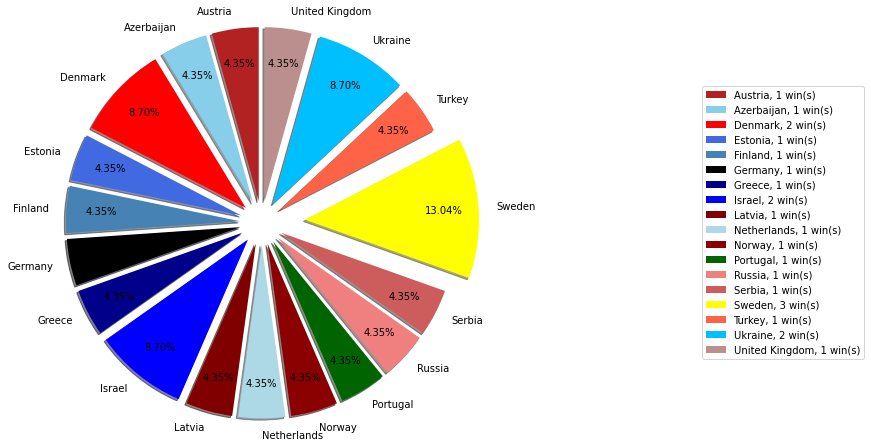

In [49]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25)
color_set=['firebrick', 'skyblue', 'red', 'royalblue', 'steelblue', 'black', 'darkblue', 'blue', 'maroon', 'lightblue', 'darkred', 'darkgreen', 'lightcoral', 'indianred', 'yellow', 'tomato', 'deepskyblue', 'rosybrown']

plt.pie(wins, labels=sorted(w_countries), explode=explode, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=0.8, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f win(s)' % (l, s) for l, s in zip(sorted(w_countries), wins)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Sweden</b>'s three wins in the 23 years gives them a <i>winning percentage</i> of 13%.

#### Who are the runners-up for each year?

In [50]:
Blank = []
Yearly = table['Year'].unique()
Country = []
Points = []

for i in range(len(Yearly)):
    Country.append(table.loc[(table['Year'] == Yearly[i])].head(2)['tCountry'].values)
    Points.append(table.loc[(table['Year'] == Yearly[i])].head(2)['Final Points'].values)
    
Runnersup = pd.DataFrame(Blank)
Runnersup.insert(0, 'Year', Yearly)
Runnersup.insert(1, 'Country', Country)
Runnersup.insert(2, 'Points', Points)

Runnersup['Country'] = Runnersup['Country'].str[1]
Runnersup['Points'] = Runnersup['Points'].str[1]

Runnersup

,Year,Country,Points
0,1957,France,17
1,1958,Switzerland,25
2,1959,United Kingdom,16
3,1960,United Kingdom,25
4,1961,United Kingdom,24
...,...,...,...
58,2015,Russia,303
59,2016,Australia,511
60,2017,Bulgaria,615
61,2018,Cyprus,436


We need to make some changes to this table:
- There was no runners-up in 1956.
- The runners-up for 1969 was actually Switzerland because of a four-way tie at the top.
- The runners-up for 1991 was France.

In [51]:
Runnersup.at[12, 'Country'] = 'Switzerland'
Runnersup.at[12, 'Points'] = 13
Runnersup.at[34, 'Country'] = 'France'

Runnersup.head(35)

,Year,Country,Points
0,1957,France,17
1,1958,Switzerland,25
2,1959,United Kingdom,16
3,1960,United Kingdom,25
4,1961,United Kingdom,24
5,1962,Monaco,13
6,1963,Switzerland,40
7,1964,United Kingdom,17
8,1965,United Kingdom,26
9,1966,Sweden,16


This gives us another concise table of just runners-up.

#### Who have lost the most Eurovisions?

In [52]:
Runnersup.groupby(['Country']).count().sort_values('Points', ascending=False)

,Year,Points
Country,,
United Kingdom,16,16
Switzerland,4,4
Spain,4,4
Russia,4,4
France,4,4
Germany,4,4
Italy,3,3
Israel,2,2
Ukraine,2,2


The <b>United Kingdom</b>! At a total of 16 (!) times, the <b>United Kingdom</b> takes pole position at finishing as runners-up. Germany, France, Russia, Spain, and Switerzland are in a distant second with each finishing as runners-up only four times.

#### Which years did the United Kingdom lose it and how many points did they get?

In [53]:
Runnersup.loc[(Runnersup['Country'] == 'United Kingdom')]

,Year,Country,Points
2,1959,United Kingdom,16
3,1960,United Kingdom,25
4,1961,United Kingdom,24
7,1964,United Kingdom,17
8,1965,United Kingdom,26
10,1967,United Kingdom,40
11,1968,United Kingdom,28
13,1970,United Kingdom,26
15,1972,United Kingdom,114
18,1975,United Kingdom,138


The <b>United Kingdom</b>'s losses span over five decades, and they have not made it back to the finals since 1998.

#### How does the United Kingdom's 1998 defeat compare to every other?

In [54]:
Runnersup.sort_values('Points', ascending=False).head(18)

,Year,Country,Points
60,2017,Bulgaria,615
59,2016,Australia,511
62,2019,Italy,461
61,2018,Cyprus,436
58,2015,Russia,303
47,2004,Serbia & Montenegro,263
55,2012,Russia,259
49,2006,Russia,248
57,2014,Netherlands,238
50,2007,Ukraine,235


Since the points assigned have increased, their defeat in 1998 is only 18th ranked.

#### What was the United Kingdom's losing percentage during each of their defeats?

In [55]:
unitedkingdom = {'year': [1959, 1960, 1961, 1964, 1965, 1967, 1968, 1970, 1972, 1975, 1977, 1988, 1989, 1992, 1993, 1998], 'pct': list(np.around(np.array([1/4, 2/5, 3/6, 4/9, 5/10, 6/12, 7/13, 8/15, 9/17, 10/20, 11/22, 12/33, 13/34, 14/37, 15/38, 16/43]), 2))}
print(unitedkingdom['pct'])

[0.25, 0.4, 0.5, 0.44, 0.5, 0.5, 0.54, 0.53, 0.53, 0.5, 0.5, 0.36, 0.38, 0.38, 0.39, 0.37]


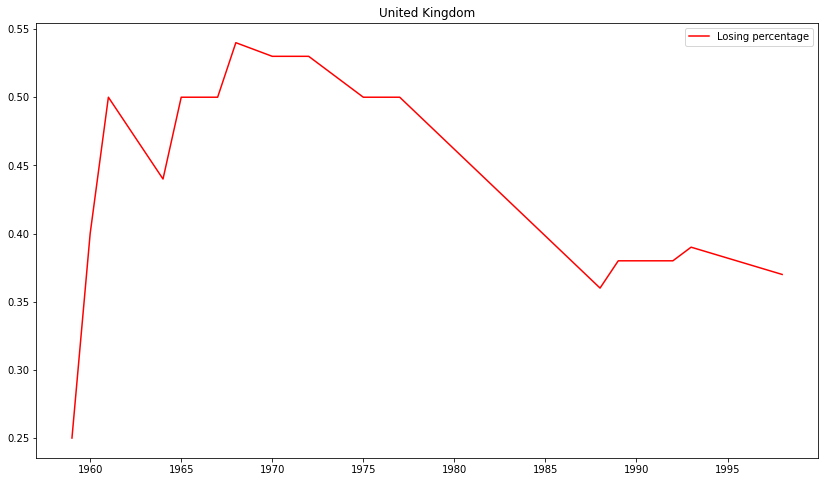

In [56]:
plt.figure(figsize=(14,8))

plt.title('United Kingdom')
plt.plot(unitedkingdom['year'], unitedkingdom['pct'], label='Losing percentage', color='red')

plt.legend()

plt.show()

Defining <i>losing percentage</i> as the percentage of the total amount of losses in relative to the total amount of competitions, we see the <b>United Kingdom</b>'s percentage peaked in 1968 when they lost four finals in five years. Their <i>losing percentage</i> would be at least 50% after half their losses.

The <b>United Kingdom</b>'s current <i>losing percentage</i> is only at 25%.

#### Who else have been losing after the British?

In [57]:
postuk = Runnersup.tail(21)
postuk.groupby(['Country']).count().sort_values('Points', ascending=False)

,Year,Points
Country,,
Russia,4,4
Iceland,2,2
Italy,2,2
Malta,2,2
Ukraine,2,2
Australia,1,1
Azerbaijan,1,1
Belgium,1,1
Bulgaria,1,1


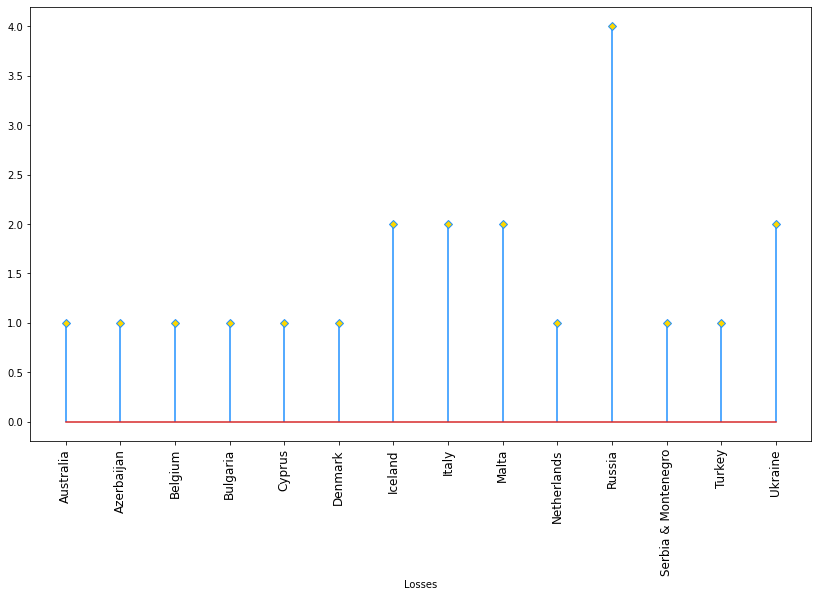

In [58]:
l_countries = [country for country in postuk.Country.unique()]
losses = [lose for lose in postuk.groupby(['Country']).count()['Points']]

plt.figure(figsize=(14,8))

markerline, stemlines, baseline=plt.stem(sorted(l_countries), losses, linefmt='dodgerblue', markerfmt='D')
markerline.set_markerfacecolor('gold')
plt.xticks(rotation='vertical', size=12)
plt.xlabel('Losses')

plt.show()

<b>Russia</b>! <b>Russia</b> tops the list with four losses in the 21 years after the United Kingdom's last loss!

#### What is Russia's losing percentage in the last 21 years?

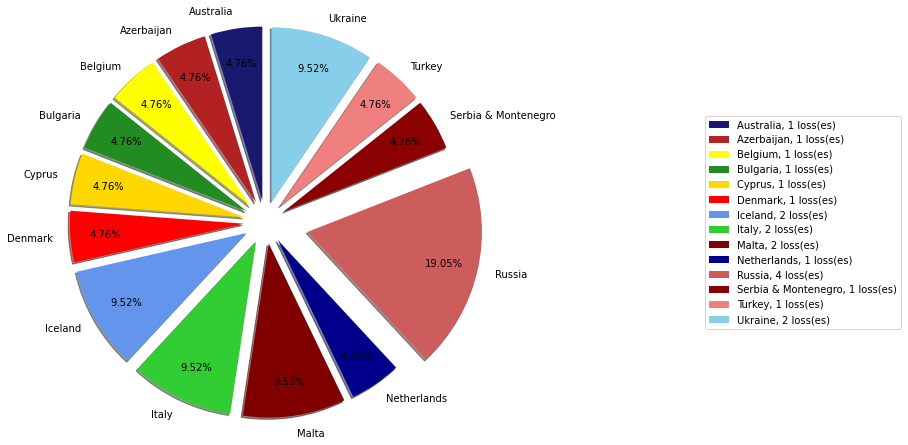

In [59]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25)
color_set = ['midnightblue', 'firebrick', 'yellow', 'forestgreen', 'gold', 'red', 'cornflowerblue', 'limegreen', 'maroon', 'darkblue', 'indianred', 'darkred', 'lightcoral', 'skyblue']

plt.pie(losses, labels=sorted(l_countries), explode=explode, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=0.8, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f loss(es)' % (l, s) for l, s in zip(sorted(l_countries), losses)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Russia</b>'s four losses in the 21 years gives them a <i>losing percentage</i> of 19%.

#### How do the winners and runners-up compare in points differential?

Since we already have the tables for winners and runners-up, we can just combine them to form a new table.

In [60]:
difference = Winners
difference['rPoints'] = Runnersup['Points']
difference = difference.rename(columns={'Points': 'wPoints'})

difference

,Year,Country,wPoints,rPoints
0,1957,Netherlands,31,17.0
1,1958,France,27,25.0
2,1959,Netherlands,21,16.0
3,1960,France,32,25.0
4,1961,Luxembourg,31,24.0
...,...,...,...,...
62,2019,Netherlands,492,461.0
63,1956,Switzerland,0,NaN
64,1969,France,18,NaN
65,1969,Netherlands,18,NaN


We need to make some changes to this table:
- Points were not published in 1956, so that entry needs to be removed.
- The blank entries for 1969 are 13.

In [61]:
difference = difference.drop([63])
difference.at[64, 'rPoints'] = 13
difference.at[65, 'rPoints'] = 13
difference.at[66, 'rPoints'] = 13

difference

,Year,Country,wPoints,rPoints
0,1957,Netherlands,31,17.0
1,1958,France,27,25.0
2,1959,Netherlands,21,16.0
3,1960,France,32,25.0
4,1961,Luxembourg,31,24.0
...,...,...,...,...
61,2018,Israel,529,436.0
62,2019,Netherlands,492,461.0
64,1969,France,18,13.0
65,1969,Netherlands,18,13.0


In [62]:
difference['wPoints'] = pd.to_numeric(difference['wPoints'])
difference['rPoints'] = pd.to_numeric(difference['rPoints'])
difference['Difference'] = difference['wPoints'] - difference['rPoints']
difference.sort_values('Difference', ascending=False)

,Year,Country,wPoints,rPoints,Difference
52,2009,Norway,387,218.0,169.0
60,2017,Portugal,758,615.0,143.0
55,2012,Sweden,372,259.0,113.0
61,2018,Israel,529,436.0,93.0
53,2010,Germany,246,170.0,76.0
...,...,...,...,...,...
1,1958,France,27,25.0,2.0
46,2003,Turkey,167,165.0,2.0
11,1968,Spain,29,28.0,1.0
31,1988,Switzerland,137,136.0,1.0


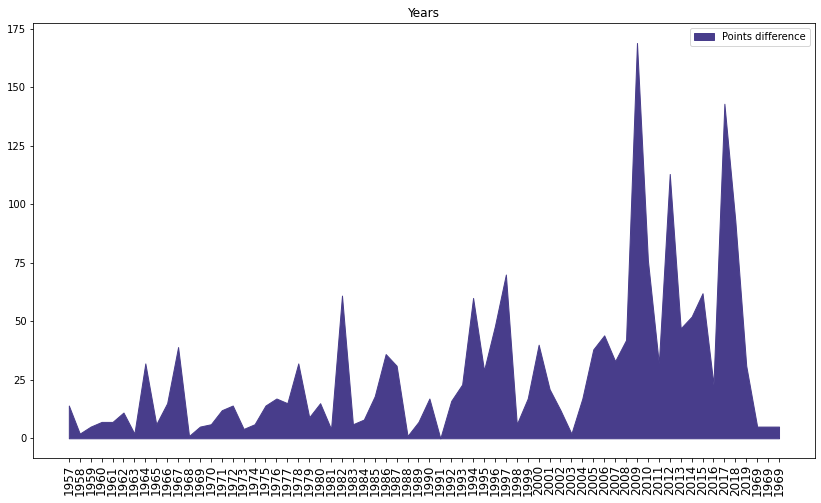

In [63]:
years = difference['Year'].to_list()
points_diff = difference['Difference'].to_list()

plt.figure(figsize=(14,8))

plt.title('Years')
plt.fill_between(np.arange(len(years)), points_diff, label='Points difference', color='darkslateblue')
plt.xticks(range(len(years)), years, rotation='vertical', size=12)

plt.legend()

plt.show()

<b>Norway</b>'s 2009 win by 169 points puts them at the top of the list, while <b>Sweden</b>'s 1991 win by 0 points is actually through a tiebreaker.

#### What is the breakdown of victories by point categories?

Defining <i>point category</i> by the tens, we are going to group the occurences of winning by 10+, 20+, 30+,... points.

In [64]:
difference['Category'] = difference['Difference'].astype(str).str[0:-3]+'0'
difference = difference[:-3]
difference

,Year,Country,wPoints,rPoints,Difference,Category
0,1957,Netherlands,31,17.0,14.0,10
1,1958,France,27,25.0,2.0,0
2,1959,Netherlands,21,16.0,5.0,0
3,1960,France,32,25.0,7.0,0
4,1961,Luxembourg,31,24.0,7.0,0
...,...,...,...,...,...,...
58,2015,Sweden,365,303.0,62.0,60
59,2016,Ukraine,534,511.0,23.0,20
60,2017,Portugal,758,615.0,143.0,140
61,2018,Israel,529,436.0,93.0,90


The last three entries are not going to be included because we want to count 1969 just once.

In [65]:
point_category = difference.groupby(['Category']).count().sort_values('Country', ascending=False)
point_category

,Year,Country,wPoints,rPoints,Difference
Category,,,,,
0,20,20,20,20,20
10,15,15,15,15,15
30,9,9,9,9,9
40,5,5,5,5,5
20,4,4,4,4,4
60,3,3,3,3,3
70,2,2,2,2,2
110,1,1,1,1,1
140,1,1,1,1,1


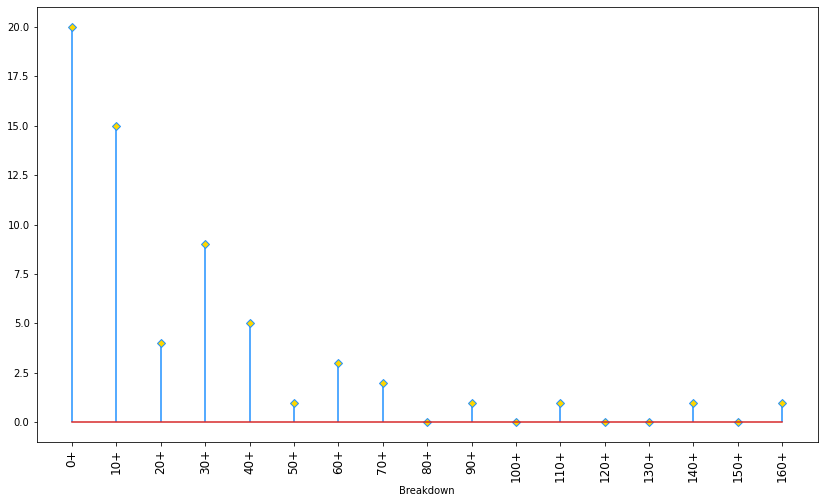

In [66]:
category = ['0+', '10+', '20+', '30+', '40+', '50+', '60+', '70+', '80+', '90+', '100+', '110+', '120+', '130+', '140+', '150+', '160+']
occurence = [20, 15, 4, 9, 5, 1, 3, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1]

plt.figure(figsize=(14,8))

markerline, stemlines, baseline=plt.stem(category, occurence, linefmt='dodgerblue', markerfmt='D')
markerline.set_markerfacecolor('gold')
plt.xticks(rotation='vertical', size=12)
plt.xlabel('Breakdown')

plt.show()

The majority of victories came within 20 points, and the occurences greatly decrease as the point differentials increase. Outliers are effectively anything above 80+ points, and there are only four occurences.

#### What is the percentage of the point categories?

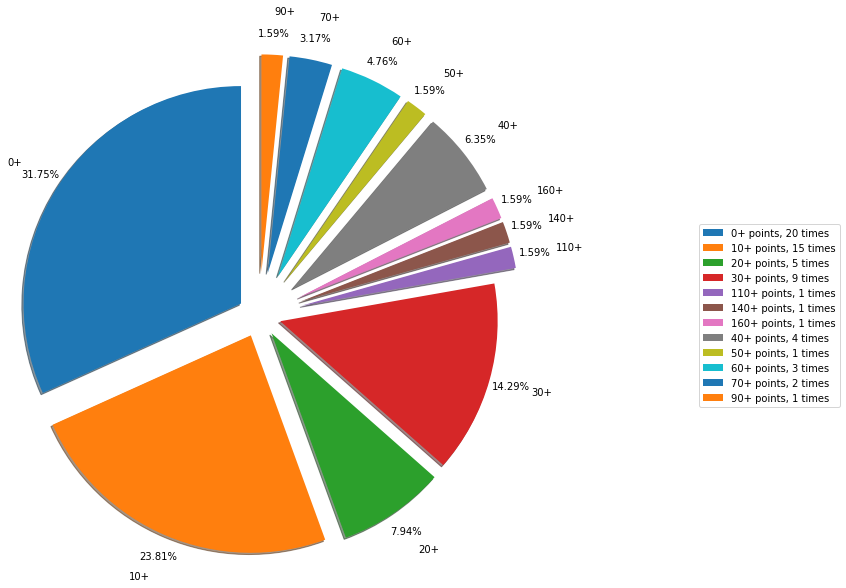

In [67]:
labels = ['0+','10+','20+','30+','110+','140+','160+','40+','50+','60+','70+','90+']
sizes = [20, 15, 5, 9, 1, 1, 1, 4, 1, 3, 2, 1]
explode = (0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, radius=2.5, pctdistance=1.1, labeldistance=1.2)
plt.legend(labels=['%s points, %1.0f times' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

About a third are within 10 points, over half are within 20 points, and three-quarters are within 40 points of each other.

#### Who are the four outliers and who did they defeat?

In [68]:
difference.loc[(difference['Difference'] >= 80)]

,Year,Country,wPoints,rPoints,Difference,Category
52,2009,Norway,387,218.0,169.0,160
55,2012,Sweden,372,259.0,113.0,110
60,2017,Portugal,758,615.0,143.0,140
61,2018,Israel,529,436.0,93.0,90


In [69]:
Runnersup.loc[(Runnersup['Year'] == '2009') | (Runnersup['Year'] == '2012') | (Runnersup['Year'] == '2017') | (Runnersup['Year'] == '2018')]

,Year,Country,Points
52,2009,Iceland,218
55,2012,Russia,259
60,2017,Bulgaria,615
61,2018,Cyprus,436


So <b>Norway</b> defeated <b>Iceland</b> in 2009, <b>Sweden</b> defeated <b>Russia</b> in 2012, <b>Portugal</b> defeated <b>Bulgaria</b> in 2017, and <b>Israel</b> defeated <b>Cyprus</b> in 2018.

#### Is there a pattern of assigning points in favour of other countries?

Do certain countries have more of an affinity towards other countries. Let's set up a new data frame and look at a few select countries.

In [70]:
sweden_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Sweden']
sweden_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Denmark,306
Norway,300
Ireland,244
Finland,194
Netherlands,190


Looking just at <b>Sweden</b>, we see the Swedes having quite the affinity with their neighbours the Danes and the Norwegians, giving them 289 and 286 points respectively throughout the entirety of the history of the competition. Let's see if the feeling is mutual from the Danes and the Norwegians.

In [71]:
denmark_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Denmark']
denmark_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,449
Norway,277
Germany,193
Netherlands,192
Ireland,187


In [72]:
norway_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Norway']
norway_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,451
Denmark,307
Ireland,197
Netherlands,190
Finland,176


It is! Both the Danes and the Norwegians give the Swedes back first and each other second!

#### Is there something similar in southern Europe?

In [73]:
spain_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Spain']
spain_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Portugal,261
Germany,237
Italy,234
Greece,192
Sweden,182


In [74]:
italy_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Italy']
italy_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
France,147
United Kingdom,130
Ireland,128
Spain,120
Switzerland,119


In [75]:
portugal_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Portugal']
portugal_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Spain,221
Italy,218
Sweden,205
Germany,185
Belgium,178


There is a bit of affinity there, but it is nowhere near as strong as the Scandinavians. <b>Portugal</b> has an affinity with <b>Spain</b> and <b>Italy</b>, and while <b>Spain</b> generally feels the same way, <b>Italy</b> prefers the British, the French, and the Irish more.

#### What about the Balkans?

In [76]:
albania_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Albania']
albania_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Greece,230
North Macedonia,183
Italy,132
Turkey,113
Azerbaijan,92


In [77]:
bosnia_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Bosnia & Herzegovina']
bosnia_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Croatia,176
Turkey,133
North Macedonia,114
Serbia,110
Slovenia,110


In [78]:
croatia_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Croatia']
croatia_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Bosnia & Herzegovina,194
North Macedonia,157
Serbia,156
Slovenia,135
Russia,113


In [79]:
montenegro_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Montenegro']
montenegro_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Serbia,179
Russia,123
Albania,121
Slovenia,90
Azerbaijan,88


In [80]:
serbia_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Serbia']
serbia_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Hungary,156
North Macedonia,135
Russia,100
Slovenia,97
Croatia,89


<b>Bosnia</b> and <b>Croatia</b> definitely have an affinity for each other, but the countries in the region generally give their points to their neighbours across other parts of central and eastern Europe.

#### How about the rest of central and eastern Europe?

In [81]:
russia_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Russia']
russia_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Armenia,187
Azerbaijan,187
Moldova,170
Ukraine,148
Norway,113


In [82]:
poland_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Poland']
poland_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Ukraine,171
Sweden,132
Norway,125
Australia,115
Belgium,105


In [83]:
ukraine_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Ukraine']
ukraine_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Belarus,155
Russia,144
Moldova,121
Azerbaijan,117
Georgia,115


In [84]:
romania_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Romania']
romania_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Moldova,245
Greece,166
Hungary,136
Russia,128
Turkey,107


In [85]:
hungary_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Hungary']
hungary_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Netherlands,118
Denmark,112
Azerbaijan,110
Iceland,108
Norway,106


In [86]:
bulgaria_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Bulgaria']
bulgaria_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Greece,112
Armenia,110
North Macedonia,109
Turkey,96
Ukraine,95


The affinity is definitely very regional here as central and eastern European countries tend to have each other in their top fives.

#### How do the western Europeans feel about each other?

In [87]:
france_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'France']
france_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Portugal,262
Israel,252
Netherlands,195
United Kingdom,195
Turkey,190


In [88]:
germany_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Germany']
germany_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,249
Turkey,208
Netherlands,198
Norway,197
Israel,190


In [89]:
ireland_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Ireland']
ireland_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
United Kingdom,252
Sweden,243
Norway,228
Netherlands,199
Denmark,195


In [90]:
netherlands_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Netherlands']
netherlands_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,272
Belgium,229
Denmark,218
Norway,210
Israel,185


In [91]:
belgium_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Belgium']
belgium_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Netherlands,268
Sweden,218
Ireland,208
United Kingdom,187
France,184


In [92]:
uk_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'United Kingdom']
uk_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Ireland,325
Sweden,278
Switzerland,183
Lithuania,181
Israel,180


Western European countries gift points all over the place, but there still exists the mutual affinities between the <b>United Kingdom-Ireland</b> and the <b>Netherlands-Belgium</b>.

#### How neutral are Austria and Switzerland here?

Did you know Switzerland is not the only country to declare permanent neutrality but also Austria as well? It is not that well known, but it is true! So is there a specific pattern to their points giving?

In [93]:
switzerland_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Switzerland']
switzerland_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,219
Ireland,217
United Kingdom,206
Italy,195
Israel,192


In [94]:
austria_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Austria']
austria_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Ireland,214
Sweden,199
Switzerland,190
Netherlands,189
United Kingdom,189


Both countries love <b>Sweden</b>, <b>Ireland</b>, and the <b>United Kingdom</b>, and they generally prefer their western and northern European neighbours.

#### What about the non-European participants?

In [95]:
australia_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Australia']
australia_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,104
Moldova,71
Belgium,70
Israel,53
Bulgaria,49


In [96]:
israel_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Israel']
israel_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Sweden,208
Romania,182
Russia,170
France,159
United Kingdom,155


In [97]:
morocco_giving_points = eurovisiondata.loc[(eurovisiondata['fCountry']) == 'Morocco']
morocco_giving_points.groupby(['tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(5)

,Points
tCountry,
Turkey,12
Germany,10
United Kingdom,8
Switzerland,7
Sweden,6


<b>Sweden</b> is everywhere! Everyone just loves the Swedes, so much so that both <b>Australia</b> and <b>Israel</b> have <b>Sweden</b> at their top and <b>Morocco</b>'s only entrance have them gifting the Swedes some points as well.

#### What are the top 10 affinities between countries?

In [98]:
eurovisiondata.groupby(['fCountry', 'tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(10)

Points
fCountry       tCountry        
Cyprus         Greece       467
Norway         Sweden       451
Denmark        Sweden       449
Greece         Cyprus       448
United Kingdom Ireland      325
Finland        Sweden       322
Norway         Denmark      307
Sweden         Denmark      306
               Norway       300
Iceland        Sweden       288

<b>Best friends?</b> Cyprus and Greece! They have given each other 915 points throughout the entirety of this competition. <br>
<b>Best mates?</b> Denmark, Norway, and Sweden! Not only they take up 5 of the top 10 interactions, but they also have their neighbours Finland and Iceland also gifting Sweden.

#### How do the affinities breakdown by region?

If two countries belong to a same region, it will be registered as that region. If one is different than the other, it will be considered as <i>transregional</i>.

In [99]:
agg_10_affinities = (7, 2, 0, 1, 0)

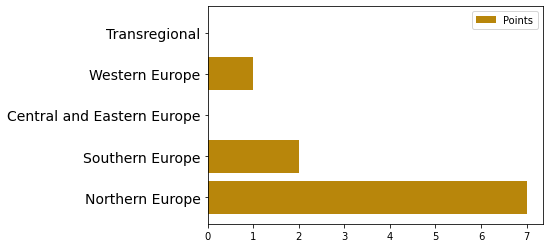

In [100]:
names = ('Northern Europe', 'Southern Europe', 'Central and Eastern Europe', 'Western Europe', 'Transregional')

plt.barh(np.arange(len(names)), agg_10_affinities, label='Points', color='darkgoldenrod')
plt.yticks(range(0, len(names)), names, rotation='horizontal', size=14)

plt.legend()

plt.show()

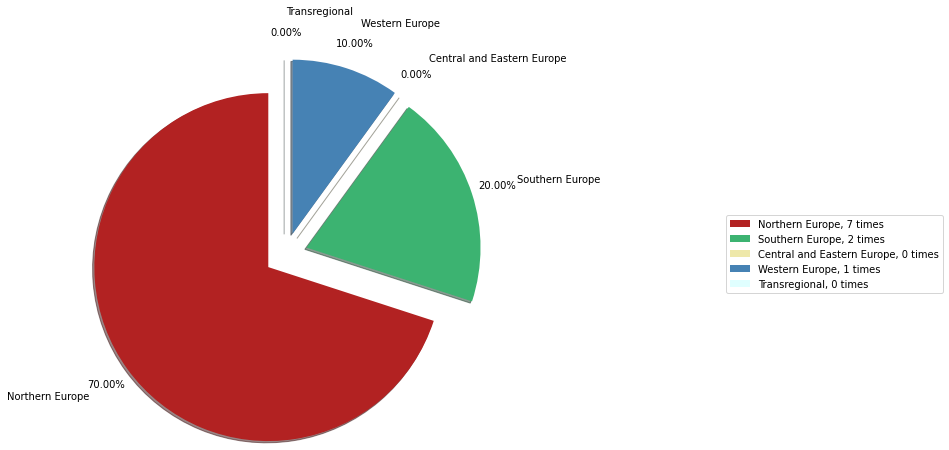

In [101]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25)
color_set = ['firebrick', 'mediumseagreen', 'palegoldenrod', 'steelblue', 'lightcyan']

plt.pie(agg_10_affinities, explode=explode, labels=names, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=1.15, labeldistance=1.27)
plt.legend(labels=['%s, %1.0f times' % (l, s) for l, s in zip(names, agg_10_affinities)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

The northern Europeans really love each other; they make up 70% of the top 10 affinities between countries.

#### What about the top 25 spots?

In [102]:
eurovisiondata.groupby(['fCountry', 'tCountry']).sum(numeric_only=True).sort_values('Points', ascending=False).head(25)

Points
fCountry        tCountry              
Cyprus          Greece             467
Norway          Sweden             451
Denmark         Sweden             449
Greece          Cyprus             448
United Kingdom  Ireland            325
Finland         Sweden             322
Norway          Denmark            307
Sweden          Denmark            306
                Norway             300
Iceland         Sweden             288
United Kingdom  Sweden             278
Denmark         Norway             277
Netherlands     Sweden             272
Belgium         Netherlands        268
France          Portugal           262
Spain           Portugal           261
Moldova         Romania            257
North Macedonia Albania            253
Ireland         United Kingdom     252
France          Israel             252
Germany         Sweden             249
Iceland         Denmark            248
Estonia         Russia             245
Moldova         Russia             245
Romania         Moldova            245

In [103]:
agg_25_affinities = (9, 3, 4, 3, 6)

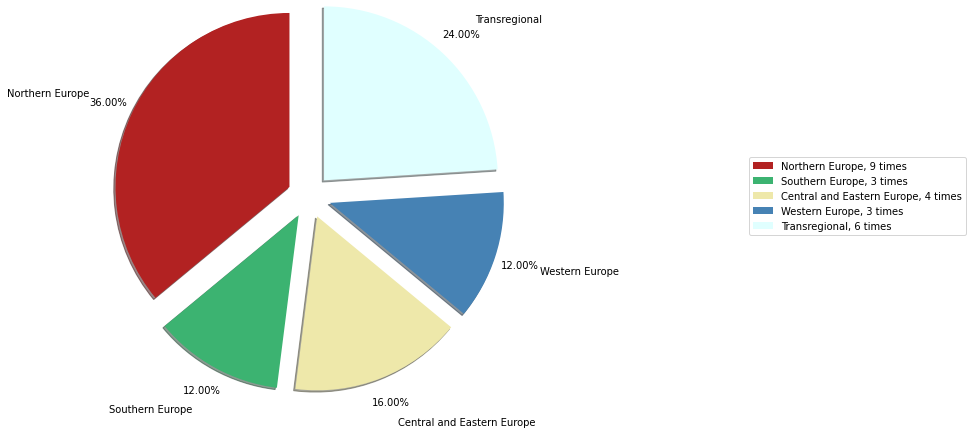

In [104]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25)
color_set = ['firebrick', 'mediumseagreen', 'palegoldenrod', 'steelblue', 'lightcyan']

plt.pie(agg_25_affinities, explode=explode, labels=names, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=1.15, labeldistance=1.27)
plt.legend(labels=['%s, %1.0f times' % (l, s) for l, s in zip(names, agg_25_affinities)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

Northern Europe is still in the lead, but of the six transregional affinities, <b>Sweden</b> appears in half of them.

## Credits

Special thanks to<br>
https://www.kaggle.com/proxyemailservices/eurovision-data-1957-to-1974
<br>
https://www.kaggle.com/datagraver/eurovision-song-contest-scores-19752019
<br>
for the datasets of the Eurovision Song Contest from 1956-2019.

Detailed background can be found here:
<br>
https://en.wikipedia.org/wiki/Eurovision_Song_Contest

Geographic definitions: <br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/911
<br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/912
<br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/913
<br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/914
<br>
https://www.thoughtco.com/where-are-the-balkan-states-4070249